In [ ]:
# pip install SPARQLWrapper
# pip install matplotlib
# pip install pandas


In [7]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:


# Define the SPARQL endpoint
sparql = SPARQLWrapper("https://api.linkeddata.cultureelerfgoed.nl/datasets/rce/cho/services/cho/sparql")  # Change this if needed

# Define the query
query = """
PREFIX graph: <https://linkeddata.cultureelerfgoed.nl/graph/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX ceo: <https://linkeddata.cultureelerfgoed.nl/def/ceo#>

SELECT  ?jaarInschrijvings (COUNT(?rijksmonument) AS ?aantal)
WHERE {
  GRAPH graph:instanties-rce {
    ?rijksmonument a ceo:Rijksmonument .
    ?rijksmonument ceo:datumInschrijvingInMonumentenregister ?datumInschrijving.
    BIND(year(xsd:dateTime(?datumInschrijving)) as ?jaarInschrijving)
    BIND(concat(str(?jaarInschrijving)) as ?jaarInschrijvings)
    MINUS { ?rijksmonument ceo:heeftJuridischeStatus <https://data.cultureelerfgoed.nl/term/id/rn/3e79bb7c-b459-4998-a9ed-78d91d069227> }
  } 
}
GROUP BY ?jaarInschrijvings
ORDER BY ?jaarInschrijvings
"""

# Set the query and return format
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

# Execute the query
results = sparql.query().convert()

# Transform results into a Pandas DataFrame
data = []
for result in results["results"]["bindings"]:
    jaar = result["jaarInschrijvings"]["value"]
    aantal = int(result["aantal"]["value"])  # Convert to integer

    data.append([jaar, aantal])

df = pd.DataFrame(data, columns=["Jaar Inschrijving", "Aantal Rijksmonumenten"])




In [ ]:
df.columns

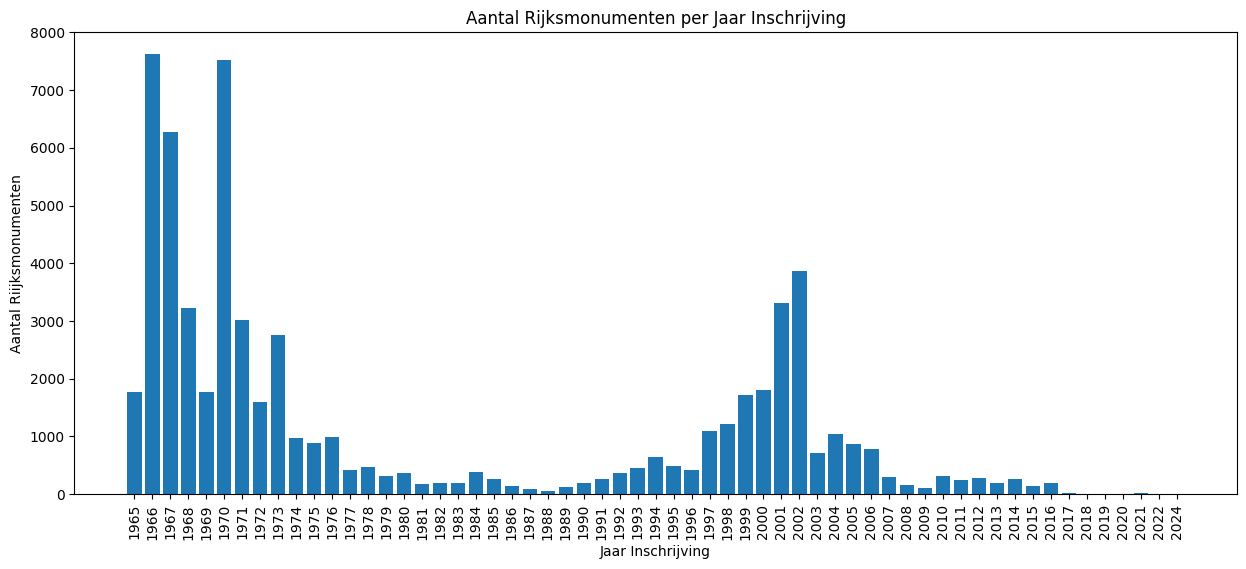

In [16]:
# Set a wider figure size
plt.figure(figsize=(15, 6))  # Adjust the width (12) as needed

plt.bar(df['Jaar Inschrijving'], df['Aantal Rijksmonumenten'])


plt.title('Aantal Rijksmonumenten per Jaar Inschrijving')
plt.xlabel('Jaar Inschrijving')
plt.ylabel('Aantal Riijksmonumenten')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()